In [51]:
import pandas as pd 
df =pd.read_csv("level_coding_siswa_150.csv")
df

,hours_coding_daily,preferred_language,typing_speed,import_usage,oop_usage,level
0,4.0,Python,44,Yes,Yes,Advanced
1,5.0,C++,59,Yes,Yes,Advanced
2,5.0,Python,55,Yes,Yes,Advanced
3,5.0,Python,59,Yes,Yes,Advanced
4,5.0,Python,55,Yes,Yes,Advanced
...,...,...,...,...,...,...
169,2.5,C++,40,No,No,Intermediate
170,4.0,Python,48,Yes,Yes,Intermediate
171,5.0,C++,34,Yes,Yes,Intermediate
172,3.5,Java,45,Yes,No,Intermediate


In [2]:
df.shape

(174, 6)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hours_coding_daily  174 non-null    float64
 1   preferred_language  174 non-null    object 
 2   typing_speed        174 non-null    int64  
 3   import_usage        174 non-null    object 
 4   oop_usage           174 non-null    object 
 5   level               174 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 8.3+ KB


In [4]:
df.describe()

,hours_coding_daily,typing_speed
count,174.000000,174.000000
mean,3.215517,38.810345
std,1.299551,14.306864
min,1.000000,20.000000
25%,2.000000,25.250000
50%,3.000000,38.000000
75%,4.000000,50.000000
max,5.500000,65.000000


In [7]:
df["preferred_language"].value_counts

<bound method IndexOpsMixin.value_counts of 0      Python
1         C++
2      Python
3      Python
4      Python
        ...  
169       C++
170    Python
171       C++
172      Java
173       C++
Name: preferred_language, Length: 174, dtype: object>

In [9]:
df["import_usage"].value_counts

<bound method IndexOpsMixin.value_counts of 0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
169     No
170    Yes
171    Yes
172    Yes
173    Yes
Name: import_usage, Length: 174, dtype: object>

In [10]:
df["oop_usage"].value_counts

<bound method IndexOpsMixin.value_counts of 0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
169     No
170    Yes
171    Yes
172     No
173     No
Name: oop_usage, Length: 174, dtype: object>

In [11]:
df["level"].value_counts

<bound method IndexOpsMixin.value_counts of 0          Advanced
1          Advanced
2          Advanced
3          Advanced
4          Advanced
           ...     
169    Intermediate
170    Intermediate
171    Intermediate
172    Intermediate
173    Intermediate
Name: level, Length: 174, dtype: object>

In [12]:
df.head()

,hours_coding_daily,preferred_language,typing_speed,import_usage,oop_usage,level
0,4.0,Python,44,Yes,Yes,Advanced
1,5.0,C++,59,Yes,Yes,Advanced
2,5.0,Python,55,Yes,Yes,Advanced
3,5.0,Python,59,Yes,Yes,Advanced
4,5.0,Python,55,Yes,Yes,Advanced


In [13]:
df.tail()

,hours_coding_daily,preferred_language,typing_speed,import_usage,oop_usage,level
169,2.5,C++,40,No,No,Intermediate
170,4.0,Python,48,Yes,Yes,Intermediate
171,5.0,C++,34,Yes,Yes,Intermediate
172,3.5,Java,45,Yes,No,Intermediate
173,3.0,C++,38,Yes,No,Intermediate


In [14]:
df.sample(5, random_state=42)

,hours_coding_daily,preferred_language,typing_speed,import_usage,oop_usage,level
155,4.5,Python,59,Yes,Yes,Intermediate
144,5.0,Python,58,Yes,Yes,Intermediate
101,1.5,C++,20,No,No,Beginner
127,3.0,C++,33,Yes,No,Intermediate
140,3.5,Java,32,Yes,No,Intermediate


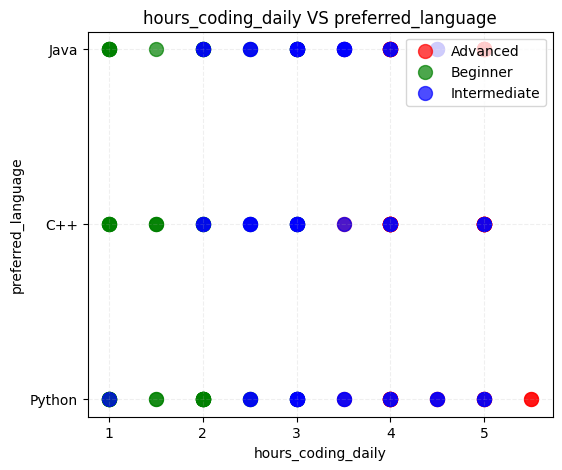

In [27]:
import matplotlib.pyplot as plt 

Advanced = df[df["level"] == "Advanced"]
Beginner = df[df["level"] == "Beginner"]
Intermediate = df[df["level"] == "Intermediate"]

plt.figure(figsize=(6,5))

plt.scatter(Advanced ["hours_coding_daily"], Advanced ["preferred_language"], s=100, alpha=0.7, color="red", label="Advanced")
plt.scatter(Beginner ["hours_coding_daily"], Beginner ["preferred_language"], s=100, alpha=0.7, color="green", label="Beginner")
plt.scatter(Intermediate ["hours_coding_daily"], Intermediate ["preferred_language"], s=100, alpha=0.7, color="blue", label="Intermediate")
plt.xlabel("hours_coding_daily")
plt.ylabel("preferred_language")
plt.title("hours_coding_daily VS preferred_language")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.2)
plt.show()

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X = df[["hours_coding_daily", "preferred_language", "typing_speed", "import_usage", "oop_usage"]]
y = df["level"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_columns = ["hours_coding_daily", "typing_speed"]
categorical_columns = ["preferred_language", "import_usage", "oop_usage"]


preprocessing = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), numeric_columns),
        ("ohe", OneHotEncoder(), categorical_columns)
    ]
)

model = Pipeline(
    steps=[
        ("preprocessing", preprocessing),
        ("model", RandomForestClassifier(random_state=42))
    ]
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred))

scores = cross_val_score(model, X_train, y_train, cv=5)

print("Nilai akurasi tiap fold:", scores)
print("Rata-rata akurasi:", scores.mean())

Accuracy : 0.8857142857142857

Classification Report :
               precision    recall  f1-score   support

    Advanced       0.94      0.94      0.94        17
    Beginner       0.88      0.88      0.88         8
Intermediate       0.80      0.80      0.80        10

    accuracy                           0.89        35
   macro avg       0.87      0.87      0.87        35
weighted avg       0.89      0.89      0.89        35


Confusion Matrix :
 [[16  0  1]
 [ 0  7  1]
 [ 1  1  8]]
Nilai akurasi tiap fold: [0.78571429 0.89285714 0.82142857 0.89285714 0.88888889]
Rata-rata akurasi: 0.8563492063492063


In [63]:
data_baru = pd.DataFrame([[4.0, "Python", 56, "Yes", "Yes", "Intermediate"]],
                         columns=["hours_coding_daily", "preferred_language", "typing_speed", "import_usage", "oop_usage", "level"])
prediksi = model.predict(data_baru)[0]
presentase = max(model.predict_proba(data_baru)[0])
print(f"Model Memprediksi {prediksi} dengan tingkat keyakinan {presentase*100:.2f}%")

Model Memprediksi Advanced dengan tingkat keyakinan 79.40%


In [65]:
import joblib

joblib.dump(model, "klasifikasi_level_coding.joblib")

['klasifikasi_level_coding.joblib']